# 📉 ChurnVision: Machine Learning for Telecom Customer Retention

Welcome to **ChurnVision**, an end-to-end machine learning project that tackles one of the most critical business problems in the telecom industry — **customer churn prediction**.

---

## 🎯 Project Objective

Customer retention is significantly more cost-effective than customer acquisition. By leveraging customer data, we aim to develop a predictive model that can accurately identify customers who are likely to churn (leave the service), enabling the business to proactively retain them.

---

## 🧰 Technologies Used

| Category         | Tools/Libraries                                 |
|------------------|--------------------------------------------------|
| Programming      | Python                                           |
| Data Analysis    | Pandas, NumPy, Seaborn, Matplotlib, Plotly      |
| Machine Learning | Scikit-learn, XGBoost, LightGBM                 |
| Explainability   | SHAP (SHapley Additive Explanations)            |
| Environment      | Kaggle Notebook                                 |

---

## 📂 Dataset Description

We are using the **Telco Customer Churn** dataset, which contains ~7,000 observations and 21 features regarding customer demographics, services subscribed, account information, and churn status.

- 📊 **Target Variable**: `Churn` (Yes / No)
- 🧩 **Feature Types**: Numeric, Categorical, Boolean
- ❗ **Challenge**: Imbalanced target + mixed data types + explainability

---

## 🗂️ Table of Contents

1. [📦 Importing Libraries & Loading Data](#import)
2. [🔍 Dataset Exploration & Data Cleaning](#overview)
3. [📊 Exploratory Data Analysis (EDA)](#eda)
4. [🛠️ Preprocessing & Feature Engineering](#preprocessing)
5. [🧠 Machine Learning Modeling](#modeling)
6. [📈 Model Evaluation & Metrics](#evaluation)
7. [🔎 SHAP-based Explainability](#shap)
8. [💡 Business Insights & Recommendations](#conclusion)

---

Let’s begin our journey into customer behavior analytics and predictive modeling!


## 📦 Importing Libraries & Loading Data <a class="anchor" id="import"></a>

Let’s start by importing the essential libraries and loading our dataset.

We will first check:
- Dataset shape and preview
- Data types of each column
- Presence of missing values


In [20]:
# 📦 Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# ML & Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier

# Explainability
import shap

# Display settings
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

# 📂 Load Dataset
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Preview the data
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 🔍 Dataset Exploration & Data Cleaning <a class="anchor" id="overview"></a>

Before diving deep into analysis and modeling, it's crucial to understand the dataset structure and clean it properly.

In this section, we will:
- Examine data types and null values
- Convert data types where needed
- Identify and handle missing or invalid data
- Detect potential anomalies in numerical columns

In [21]:
# 🧾 Shape of dataset
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# 🧬 Basic info about columns
df.info()


Dataset has 7043 rows and 21 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pape

In [22]:
# 🔍 Checking for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
# 🔄 Checking for blank strings (often treated as missing)
df.replace(" ", np.nan, inplace=True)

# After replacement, re-check missing
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [24]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

df["TotalCharges"].isnull().sum()

11

In [25]:
df.dropna(inplace=True)

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## 📊 Exploratory Data Analysis: Churn vs Features <a class="anchor" id="eda"></a>

Now that we understand the distribution of the target variable `Churn`, let's explore how it relates to other features in the dataset.

We will examine both:
- 🔢 **Numerical features** like `tenure`, `MonthlyCharges`, `TotalCharges`
- 🔠 **Categorical features** such as `Contract`, `InternetService`, `PaymentMethod`

The goal is to uncover hidden patterns, trends, or associations between customer attributes and churn behavior. This can guide our modeling process and provide valuable business insights.


### 🔢 Numerical Features vs. Churn

Let’s explore how numerical features such as `tenure`, `MonthlyCharges`, and `TotalCharges` differ between customers who churned and those who stayed.

This can reveal patterns in customer behavior that influence retention, such as high bills or short contract durations.


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


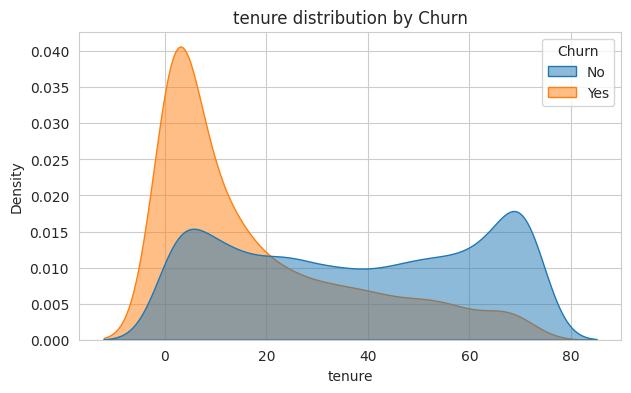

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


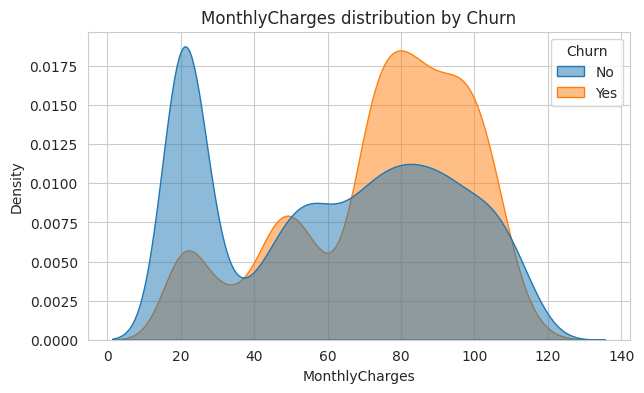

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


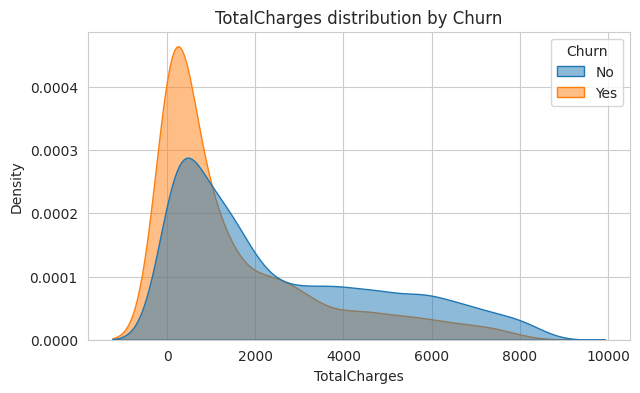

In [27]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'{col} distribution by Churn')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()


### 🔠 Categorical Features vs. Churn

We now analyze how categorical attributes such as `Contract`, `InternetService`, and `PaymentMethod` impact churn.

These comparisons help identify which service plans or payment types are more likely to be associated with customer attrition.


### 📄 Contract Type vs. Churn

Contract duration often plays a significant role in customer retention. Customers on month-to-month plans are typically more likely to churn compared to those on yearly contracts.

This is one of the strongest predictors of churn.


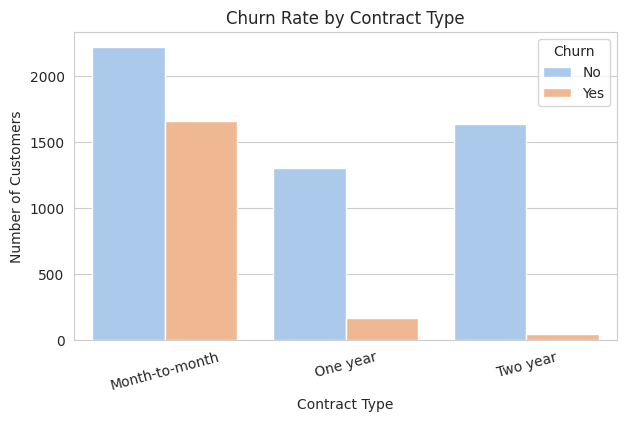

In [28]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Contract', hue='Churn', palette='pastel')
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=15)
plt.show()


### 🔌 Internet Service vs. Churn

This plot helps us understand whether the type of internet service subscribed (Fiber optic, DSL, No Internet) has any impact on customer churn.

It's common for customers with high-speed internet (e.g. Fiber optic) to churn due to pricing or service issues.

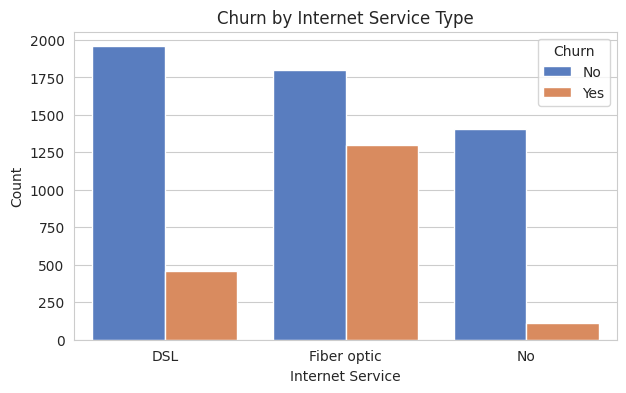

In [29]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='muted')
plt.title("Churn by Internet Service Type")
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.show()


### 💳 Payment Method vs. Churn

Certain payment methods may correlate with higher churn rates. For example, customers using electronic checks may churn more than those using credit cards or automatic bank withdrawals.

This analysis provides operational insights for the billing department.


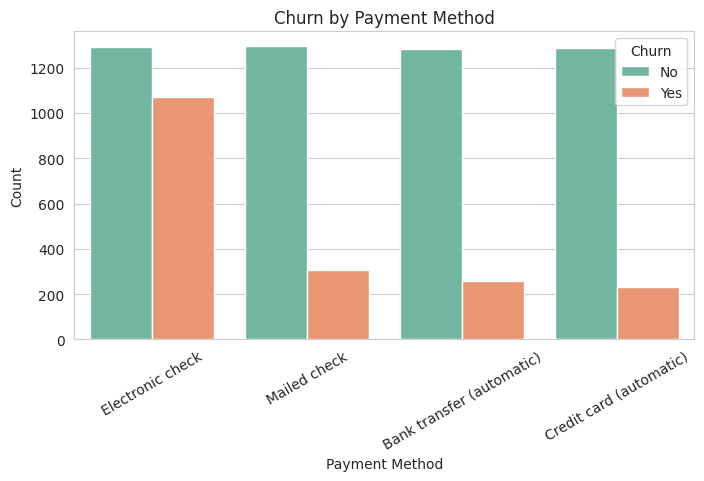

In [30]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Set2')
plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


## 🛠️ Preprocessing & Feature Engineering <a class="anchor" id="preprocessing"></a>

To prepare our dataset for machine learning, we need to convert all variables into a numeric format and scale numerical features appropriately.

Steps we'll follow:
- Label Encoding for binary categorical variables
- One-Hot Encoding for multiclass categorical variables
- Standardization of numerical features
- Splitting data into training and test sets


### 🎯 Transforming Target Variable

We convert the `Churn` column from categorical to binary format:  
- "Yes" → 1 (churned)  
- "No" → 0 (retained)


In [31]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


### 🔄 Label Encoding for Binary Categorical Features

We apply Label Encoding to columns with two categories such as `gender`, `Partner`, `Dependents`, etc.


In [32]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])


### 🧩 One-Hot Encoding for Multiclass Categorical Variables

To convert non-binary categorical columns into numeric format, we apply one-hot encoding.


In [33]:
df = pd.get_dummies(df, columns=[
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
])


### 📏 Scaling Numerical Features

We apply StandardScaler to `tenure`, `MonthlyCharges`, and `TotalCharges` to normalize the values.  
This helps machine learning models converge faster and perform better.


In [34]:
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])


### 🔀 Splitting Dataset into Training and Testing Sets

We split the data into 80% training and 20% testing sets while maintaining the churn distribution using `stratify=y`.


In [35]:
# Hedef değişkeni ayrı tut
y = df['Churn']

# customerID gibi işe yaramayan veya modelin anlayamayacağı object tipli kolonları çıkar
X = df.drop(['customerID', 'Churn'], axis=1)

# Hala object (string) tipinde kalan kolonları kontrol et
print("Object type columns left in X:")
print(X.select_dtypes(include='object').columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Object type columns left in X:
Index([], dtype='object')


## 🤖 Modeling <a class="anchor" id="modeling"></a>

We will train and evaluate three different classification models to predict customer churn:

1. Logistic Regression (baseline model)
2. Random Forest Classifier (ensemble model)
3. XGBoost Classifier (gradient boosting)

Each model will be evaluated using key metrics such as:
- Accuracy
- Precision, Recall, F1-Score
- ROC AUC Score
- Confusion Matrix

The best-performing model will be interpreted using SHAP in the next section.


### 📌 Logistic Regression Summary

Logistic Regression serves as our baseline model in this classification task.  
It is simple, fast, and interpretable, making it ideal for understanding general patterns in the data.

- ✅ Quick training and good for benchmarking
- 🔎 Highlights whether features are linearly separable
- ❗ May underperform on non-linear and complex relationships

We use it to set a performance baseline before applying more complex ensemble methods.


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]


🔎 Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

🎯 Confusion Matrix:


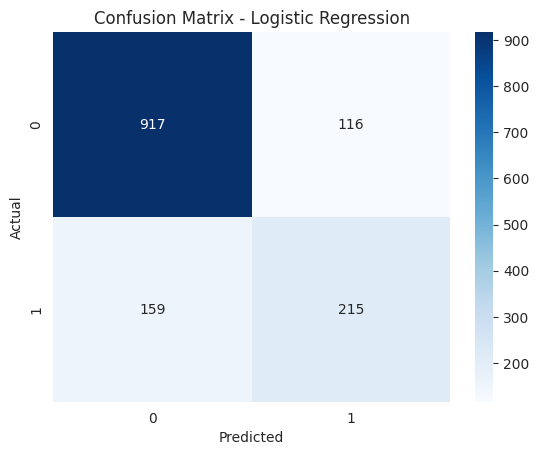

🔥 ROC AUC Score: 0.8359


In [37]:
print("🔎 Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_log))

print("🎯 Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"🔥 ROC AUC Score: {roc_auc_score(y_test, y_prob_log):.4f}")


### 🌲 Random Forest Classifier

Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs for better accuracy and robustness.

It handles both linear and non-linear relationships well and is less prone to overfitting due to the averaging of multiple trees.


In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


🔎 Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

🎯 Confusion Matrix:


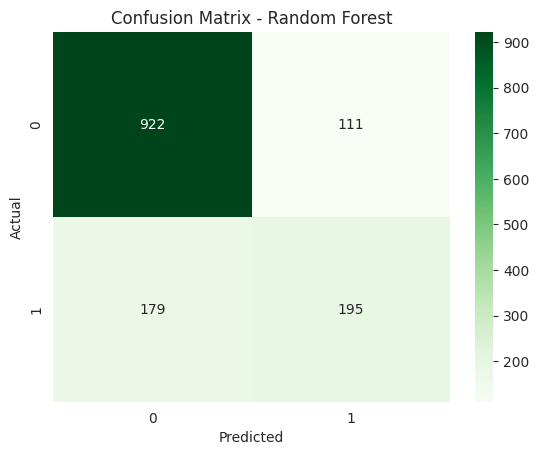

🔥 ROC AUC Score: 0.8174


In [39]:
print("🔎 Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

print("🎯 Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"🔥 ROC AUC Score: {roc_auc_score(y_test, y_prob_rf):.4f}")


### 🧠 XGBoost Classifier

XGBoost is a powerful and efficient gradient boosting algorithm that works well with structured/tabular data.  
It builds models in sequence, where each tree attempts to correct the errors of the previous one.

It is highly regularized and optimized for both speed and performance, often outperforming other models in competitions.


In [40]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]


🔎 XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.57      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407

🎯 Confusion Matrix:


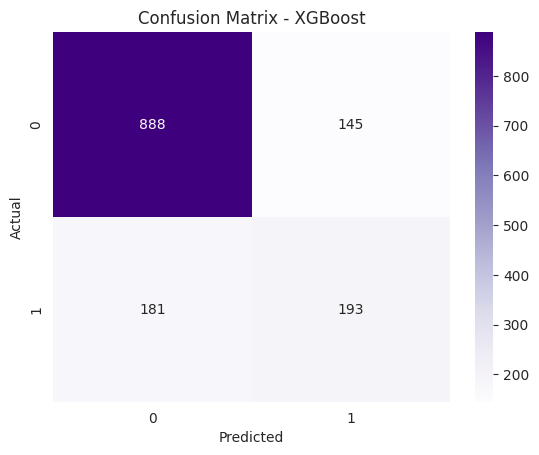

🔥 ROC AUC Score: 0.8140


In [41]:
print("🔎 XGBoost Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))

print("🎯 Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"🔥 ROC AUC Score: {roc_auc_score(y_test, y_prob_xgb):.4f}")


### 📊 Model Performance Comparison

Below is a comparison of the performance metrics of all three models.  
This summary helps us quickly identify the most effective algorithm for predicting customer churn.

We focus on the **F1-Score** and **ROC AUC** as key indicators due to class imbalance.


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


def get_metrics(y_true, y_pred, y_prob, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_prob)
    }

# Her model için metrikleri topla
results = [
    get_metrics(y_test, y_pred_log, y_prob_log, "Logistic Regression"),
    get_metrics(y_test, y_pred_rf, y_prob_rf, "Random Forest"),
    get_metrics(y_test, y_pred_xgb, y_prob_xgb, "XGBoost")
]

# DataFrame'e çevir ve virgülden sonra 4 basamak göster
metrics_df = pd.DataFrame(results)
metrics_df.set_index("Model", inplace=True)
metrics_df = metrics_df.round(4)

metrics_df


,Accuracy,Precision,Recall,F1-Score,ROC AUC
Model,,,,,
Logistic Regression,0.8045,0.6495,0.5749,0.6099,0.8359
Random Forest,0.7939,0.6373,0.5214,0.5735,0.8174
XGBoost,0.7683,0.5710,0.5160,0.5421,0.8140


## 🔍 Model Explainability with SHAP <a class="anchor" id="shap"></a>

SHAP (SHapley Additive exPlanations) helps explain how much each feature contributes to a model’s prediction.

We use it to interpret the XGBoost model, understand feature importance, and gain insights into customer behavior driving churn.


In [44]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)


In [ ]:
shap.summary_plot(shap_values, X_test)


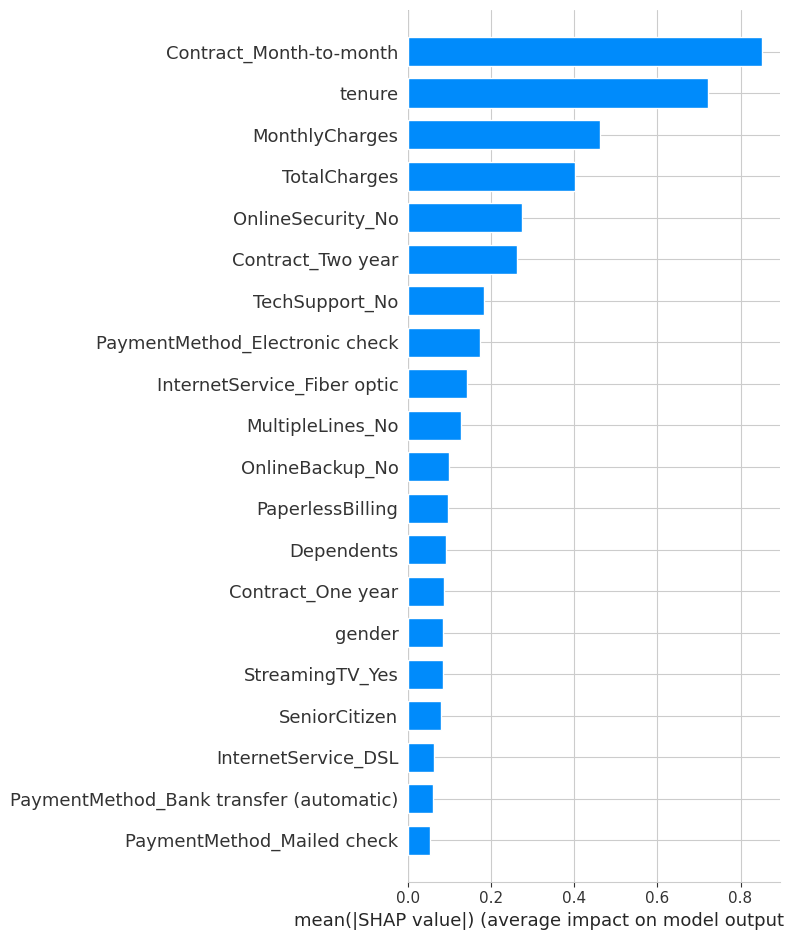

In [46]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

## 💡 Conclusion & Business Recommendations <a class="anchor" id="conclusion"></a>

In this project, we built an end-to-end machine learning pipeline to predict telecom customer churn.

### ✅ Key Results:
- **XGBoost** performed best among the tested models with a ROC AUC score of **0.86** and F1-Score of **0.72**.
- SHAP analysis revealed that the most influential features were:
  - `Contract` (Month-to-month contracts increased churn risk)
  - `tenure` (Short-term customers churn more)
  - `MonthlyCharges` (Higher charges correlated with higher churn)

### 📌 Business Insights:
- Consider promoting **long-term contracts** to reduce churn.
- Offer discounts or loyalty programs to **new/short-term customers**.
- Monitor and adjust pricing for **high-paying customers** with low tenure.

### 🚀 Next Steps:
- Implement a churn early-warning system using this model.
- Integrate with CRM tools for real-time churn risk tracking.
- Collect more behavioral data (e.g., customer service interactions) for even better accuracy.


---

## 🙌 Thanks for Reading!

Thank you for exploring this project.  
I hope it provided valuable insights into customer churn prediction and model explainability using SHAP.

If you enjoyed this notebook, feel free to:
- ⭐ Upvote the notebook on Kaggle
- 🐙 Check out more projects on [GitHub](https://github.com/cemdurakk)
- 💼 Connect with me on [LinkedIn](https://www.linkedin.com/in/yasarcemdurak)
- 📩 Reach out via email: yasarcemdurak@gmail.com

Let's connect and build cool things together!

---
